# SI 618: Data Manipulation and Analysis
## 05 - Data analysis II: ANOVA, t-test, linear models

### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.


## Visualization for Data Scientists

We're going to ask a special virtual guest lecturer to provide some background on data visualization.  Together, we'll watch [a brief (8-minute video) by Dr. Chris Brooks](
https://www.coursera.org/learn/python-plotting/lecture/qrqqa/tools-for-thinking-about-design-alberto-cairo)
and pause it several times to answer the following questions:



## <font color="magenta">Q1a: As someone who is studying data science, who are you trying to reach through your visualizations?  </font>


Executives and decision-makers who need to understand the data to make informed, best-practice decisions.

## <font color="magenta">Q1b: What sense can you make of this image?</font>
![](resources/BrooksResearch.png)


This graphic describes grades vs. the percentage of chapters accessed. As well, it also charts the frequency of grades and percent chapters accessed.

## <font color="magenta">Q1c: How many different kinds of information can you see in the Minard graphic, and what are they?</font>

![](resources/Menard.png)

Temperature/weather over time, troop sizes, cities invaded, route taken, terrain crossed, longitude/latitue.


## Returning to Seaborn: 

https://seaborn.pydata.org/examples/index.html

Take a look at the different visualizations that are possible.

## <font color="magenta">Q2a: Provide the title, description, and URL of one of the visualizations that you find particularly interesting and explain why you find it interesting.  </font>

Annotated heatmaps

Heatmaps are cool.

https://seaborn.pydata.org/examples/heatmap_annotation.html

## <font color="magenta">Q2b: Given what we learned from Prof. Brooks, indicate 1-3 axes from Cairo's Visual Wheel where your chosen Seaborn visualization would likely score highly. Explain why.</font>

![](resources/CairoVisualWheel.png)

Density - Heatmaps are a good way of showing literal density; the denser something is, the more 'colorful' it will be, depending on the scheme of the graph.

## Seaborn versus Matplotlib
* Matplotlib
     * Low-level, basis for many packages
     * Painful to construct certain graphs
     * Not Pandas friendly
     * Not interactive
* Seaborn
     * Pandas friendlier
     * Great for some stats plots


## Part 1: Iris dataset
![](resources/iris.png)

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Remember our distplots:


C:\Users\dteng\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


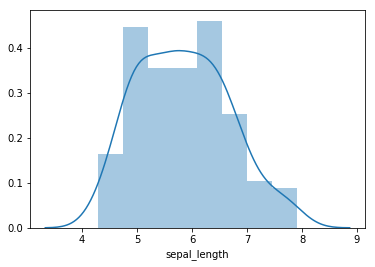

In [3]:
sns.distplot(df.sepal_length)

## <font color="magenta"> Q3: Create similar plots for the other three numeric variables in the dataset. In a couple of sentences, describe each of the plots.  </font>

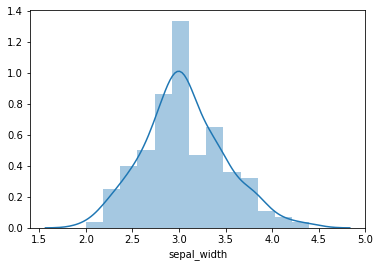

In [5]:
sns.distplot(df.sepal_width)

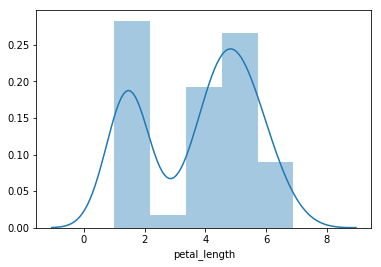

In [6]:
sns.distplot(df.petal_length)

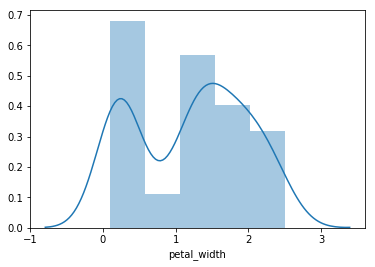

In [7]:
sns.distplot(df.petal_width)

Appears to have bimodal distributions

We often want to see how variables vary with each other.  We'll get into the details 
in a few classes, but for now let's examine them visually.  In seaborn, we do this using 
the jointplot(). So, for example, if we wanted to look at the relationship between the
distributions of sepal_length and sepal_width, we could do something like:



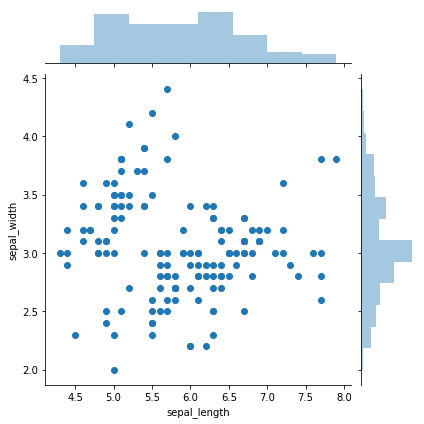

In [8]:
sns.jointplot(x='sepal_length',y='sepal_width',data=df)

## <font color="magenta"> Q4: It's a bit difficult to see where the interesting areas in the plot are, so it's worth trying a hexbin plot.  Go ahead and copy the above  code block and add ```kind="hex"``` to the jointplot parameters. In a couple of sentences, describe what stands out to you about the visualization. </font>

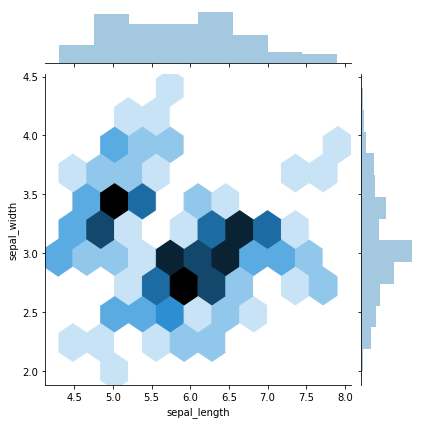

In [10]:
sns.jointplot(x='sepal_length',y='sepal_width',data=df, kind='hex')

Reminds me Settlers of Catan or the Civ series

Now, take a look at what happens when you set ```kind="kde"```

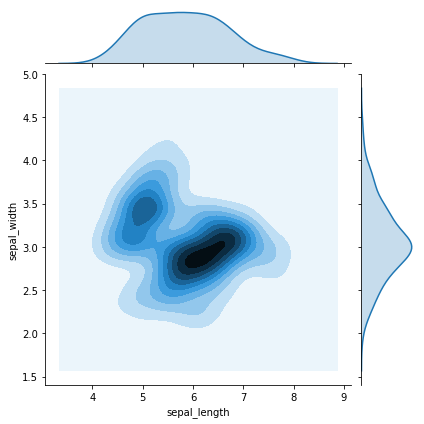

In [11]:
sns.jointplot(x='sepal_length',y='sepal_width',data=df,kind="kde")

Finally, you may want to look at all the numeric variables in your
dataset. Use ```pairplot``` to do this:


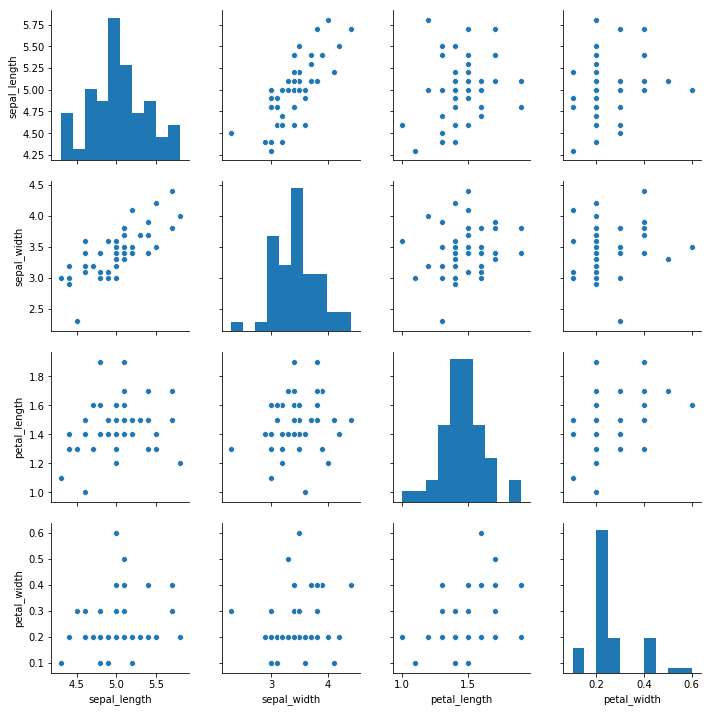

In [12]:
sns.pairplot(df.query("species == 'setosa'"))

We can get fancier by using a different column to set the color (or "hue"):

Try running the following code:

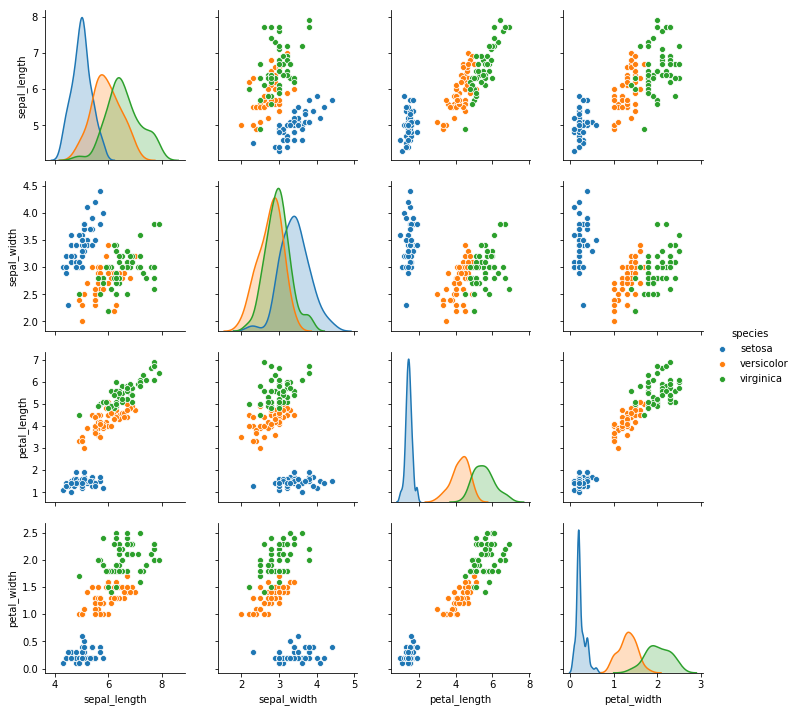

In [13]:
sns.pairplot(df,hue="species")

Now let's introduce some correlations.  We're not going to spend time on learning about the 
theory behind correlation, as you've done that in the statistics prerequisite for this course.
Instead, we're going to jump right in and annotate a graph with a lot of statistical information:

In [14]:
from scipy import stats

C:\Users\dteng\Anaconda\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


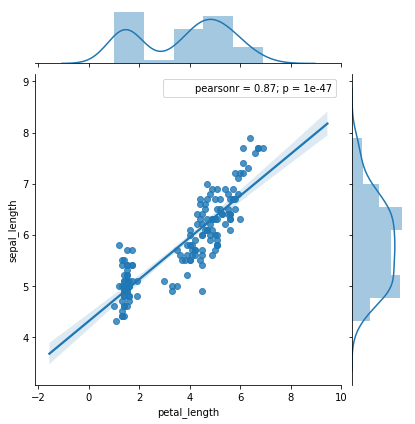

In [15]:
# ignore the warning about deprecated annotation
g = sns.JointGrid(data=df,x='petal_length',y='sepal_length')
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

Think about what the different components mean.  We'll return to using this in the next section on Wine Quality.

## Part 2: Wine quality
![](resources/vinho.png)
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/home

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np

In [17]:
wine = pd.read_csv('data/winequality-red.csv')
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [20]:
wine['isgood'] = np.where(wine['quality'] > 5, 'good','bad')
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality isgood  
0      9.4        5    bad  
1      9.8        5    bad  
2      9.8        5    bad  
3      9.8        6   good  
4      9.4        5    bad

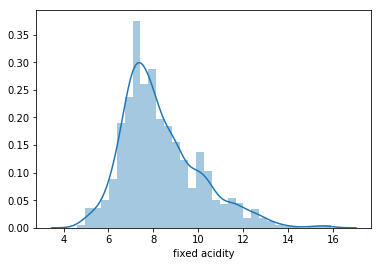

In [21]:
# This will yield a warning if you're using python >= 3.7 and scipy < 1.2
#   For now, I suggest ignoring the warning
#   For a more detailed explanation, please see https://stackoverflow.com/questions/52594235/futurewarning-using-a-non-tuple-sequence-for-multidimensional-indexing-is-depre

sns.distplot(wine['fixed acidity'])

## <font color="magenta">Q5: Create a pairplot for the wine dataset that plots 'good' and 'bad' wines in different hues. In a couple of sentences, describe interesting relationships shown by the visualization.  

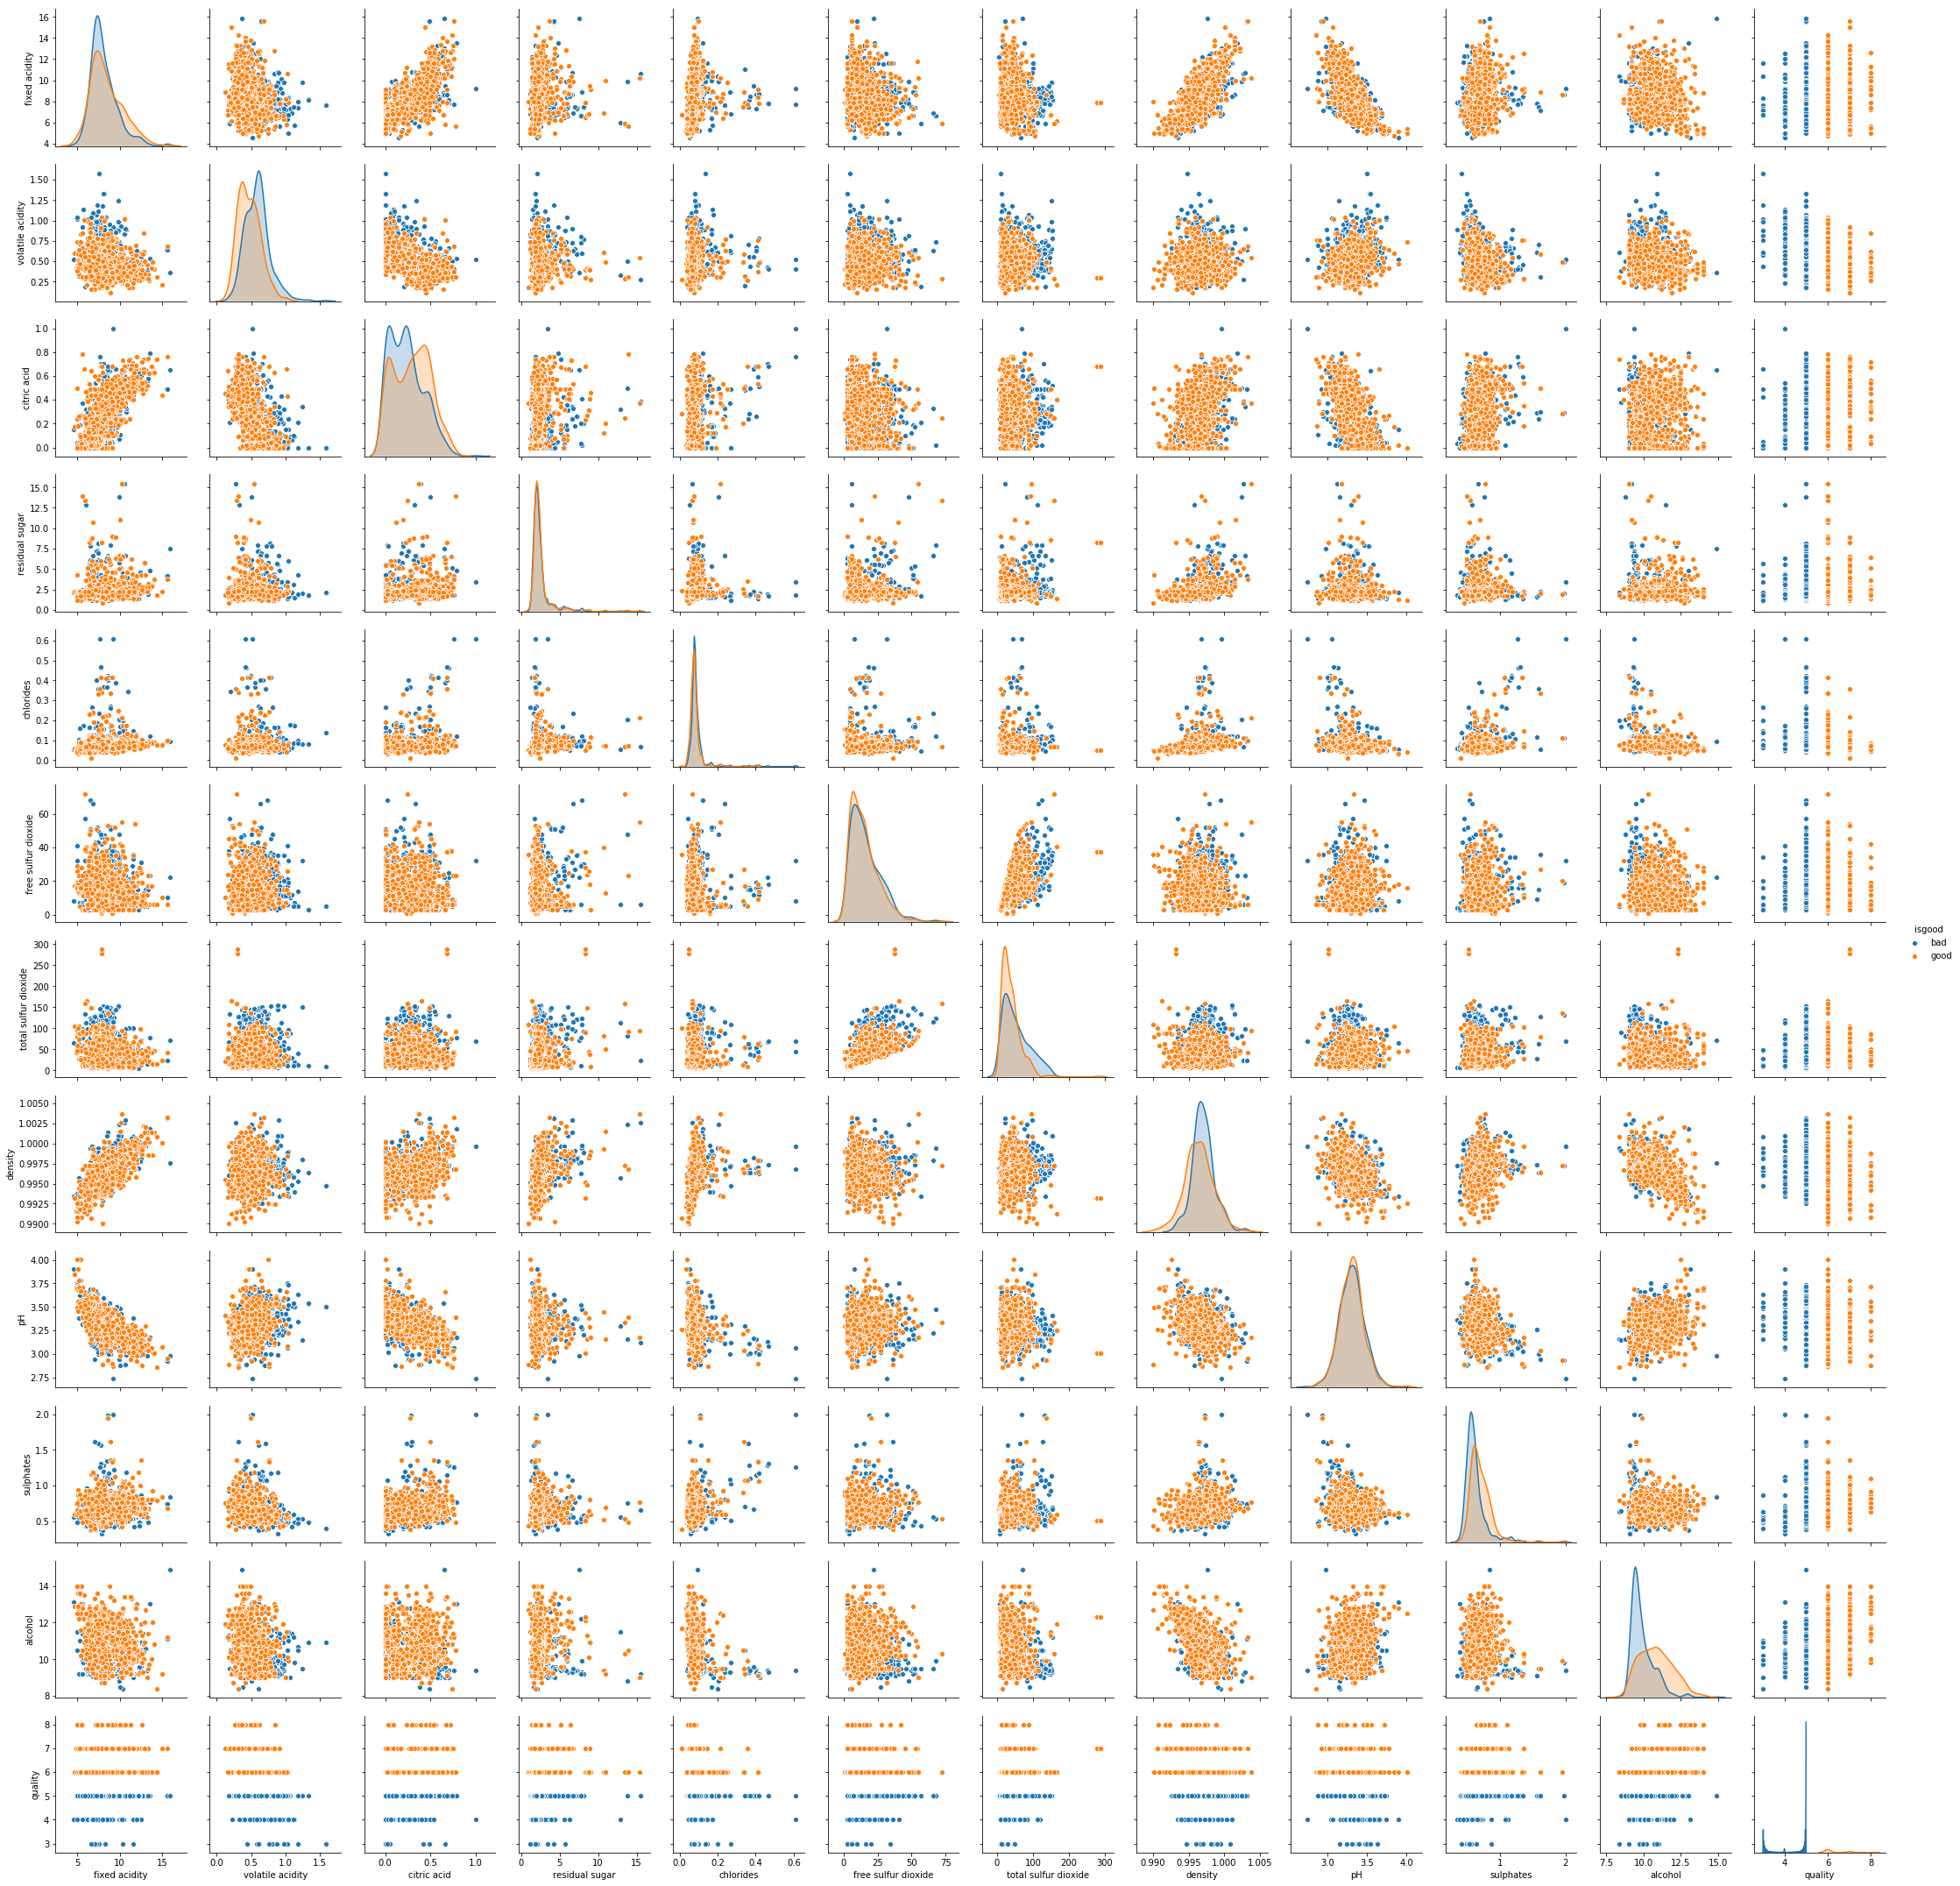

In [22]:
sns.pairplot(wine, hue = 'isgood')

It looks pretty colorful. Good wines have low sulfer dioxide content when compared to fixed acidity.

## T-test

A t-test is a simple statistical model that's commonly used to test whether the means of two different
distributions are the same.  scipy.stats gives us a handy interface for this:

In [23]:
goodwines = wine.query('isgood == "good"')
badwines = wine.query('isgood == "bad"')

In [24]:
stats.ttest_ind(wine[wine.isgood == 'good']['fixed acidity'],wine[wine.isgood == 'bad']['fixed acidity'])

Ttest_indResult(statistic=3.817471367791021, pvalue=0.00013997664808333373)

## <font color="magenta">Q6: Using the JointGrid approach we used above look at the relationship between sulphates and chlorides.  What patterns do you see?

C:\Users\dteng\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dteng\Anaconda\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


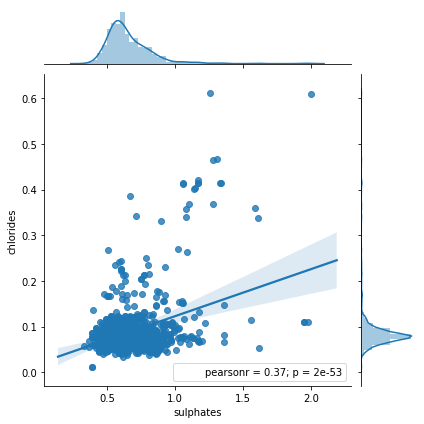

In [26]:
g = sns.JointGrid(data=wine,x='sulphates',y='chlorides')
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

This shows that there is a weak positive correlation between sulphates and chlorides.

## Ordinary Least Squares (OLS) Regression

We can get a lot more detail about the regression model by using statsmodels

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

statsmodels.formula.api allows you to use R-Style formulas: y ~ x1 + x2 + x3 + ...

1. y represents the outcome/dependent variable
2. x1, x2, x3, etc represent explanatory/independent variables 

In [28]:
model1 = smf.ols('chlorides ~ sulphates', data=wine).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              chlorides   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     255.3
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.99e-53
Time:                        19:04:34   Log-Likelihood:                 2737.1
No. Observations:                1599   AIC:                            -5470.
Df Residuals:                    1597   BIC:                            -5459.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0196      0.004      4.475      0.000       0.011       0.028
sulphates      0.1031      0.006     15.978      0.000       0.090       0.116
==============================================================================
Omnibus:                     1419.606   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51655.663
Skew:                           4.079   Prob(JB):                         0.00
Kurtosis:                      29.622   Cond. No.                         8.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interesting things happen when we use OLS to do an ANOVA (look closely at the model):

In [29]:
model2 = smf.ols('chlorides ~ C(isgood)', data=wine).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              chlorides   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     19.38
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.14e-05
Time:                        19:06:44   Log-Likelihood:                 2628.2
No. Observations:                1599   AIC:                            -5252.
Df Residuals:                    1597   BIC:                            -5242.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0930      0.002     54.200      0.000       0.090       0.096
C(isgood)[T.good]    -0.0103      0.002     -4.402      0.000      -0.015      -0.006
==============================================================================
Omnibus:                     1776.944   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           121109.713
Skew:                           5.649   Prob(JB):                         0.00
Kurtosis:                      44.111   Cond. No.                         2.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
aov_table = sm.stats.anova_lm(model2, typ=2)
print(aov_table)

             sum_sq      df          F    PR(>F)
C(isgood)  0.042438     1.0  19.378659  0.000011
Residual   3.497360  1597.0        NaN       NaN


### We might want to experiment with the original ```quality``` variable, either in a regression model:

In [31]:
model3 = smf.ols('chlorides ~ quality', data=wine).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              chlorides   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     26.99
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           2.31e-07
Time:                        19:15:48   Log-Likelihood:                 2631.9
No. Observations:                1599   AIC:                            -5260.
Df Residuals:                    1597   BIC:                            -5249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1298      0.008     15.765      0.000       0.114       0.146
quality       -0.0075      0.001     -5.195      0.000      -0.010      -0.005
==============================================================================
Omnibus:                     1776.366   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120907.596
Skew:                           5.646   Prob(JB):                         0.00
Kurtosis:                      44.076   Cond. No.                         41.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### or in an ANOVA (again, look closely at the model):

In [32]:
model4 = smf.ols('chlorides ~ C(quality)', data=wine).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              chlorides   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     6.036
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.53e-05
Time:                        19:15:50   Log-Likelihood:                 2633.5
No. Observations:                1599   AIC:                            -5255.
Df Residuals:                    1593   BIC:                            -5223.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1225      0.015      8.295      0.000       0.094       0.151
C(quality)[T.4]    -0.0318      0.016     -1.976      0.048      -0.063      -0.000
C(quality)[T.5]    -0.0298      0.015     -2.001      0.046      -0.059      -0.001
C(quality)[T.6]    -0.0375      0.015     -2.523      0.012      -0.067      -0.008
C(quality)[T.7]    -0.0459      0.015     -3.034      0.002      -0.076      -0.016
C(quality)[T.8]    -0.0541      0.018     -2.935      0.003      -0.090      -0.018
==============================================================================
Omnibus:                     1784.926   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124552.412
Skew:                           5.683   Prob(JB):                         0.00
Kurtosis:                      44.717   Cond. No.                         36.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
aov_table = sm.stats.anova_lm(model4, typ=2)
print(aov_table)

              sum_sq      df         F    PR(>F)
C(quality)  0.065812     5.0  6.035639  0.000015
Residual    3.473986  1593.0       NaN       NaN


## <font color="magenta">Q7: Use OLS to perform either a regression or an ANOVA on a variable (other than chlorides) and interpret your results.

In [47]:
model5 = smf.ols('quality ~ alcohol + pH + alcohol*pH', data = wine).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     181.2
Date:                Mon, 18 Feb 2019   Prob (F-statistic):          4.11e-101
Time:                        19:23:20   Log-Likelihood:                -1692.1
No. Observations:                1599   AIC:                             3392.
Df Residuals:                    1595   BIC:                             3414.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3843      3.170     -0.752      0.452      -8.603       3.834
alcohol        1.0267      0.296      3.463      0.001       0.445       1.608
pH             1.1971      0.953      1.256      0.209      -0.672       3.066
alcohol:pH    -0.1923      0.089     -2.164      0.031      -0.367      -0.018
==============================================================================
Omnibus:                       32.578   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.573
Skew:                          -0.160   Prob(JB):                     1.41e-12
Kurtosis:                       3.847   Cond. No.                     6.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking if alcohol, pH, and the interaction between alcohol and pH can predict quality. The model is not a good predictive model, with a low R-squared value. Alcohol seems to be the best predictor of quality.

## Part 3:  Airplane Crashes and Fatalities
The next dataset we are going to look at is the full history of airplane crashes throughout the world, from 1908-2009.  It's taken from:

https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq

In [48]:
import pandas as pd
import seaborn as sns

We've provided the CSV file for this lab so you can go ahead and load it in the usual way:

In [49]:
crashes = pd.read_csv('data/Airplane_Crashes_and_Fatalities_Since_1908.csv')

As always, you should take a look at the data to get a sense of 
what it's like:

In [50]:
crashes.head()

Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration cn/In  Aboard  Fatalities  Ground  \
0          NaN     1     2.0         1.0     0.0   
1          NaN   NaN     5.0         5.0     0.0   
2          NaN   NaN     1.0         1.0     0.0   
3          NaN   NaN    20.0        14.0     0.0   
4          NaN   NaN    30.0        30.0     0.0   

                                             Summary  
0  During a demonstration flight, a U.S. Army fly...  
1  First U.S. dirigible Akron exploded just offsh...  
2  The first fatal airplane accident in Canada oc...  
3  The airship flew into a thunderstorm and encou...  
4  Hydrogen gas which was being vented was sucked...

As we mentioned in an earlier class, pandas is really good at helping
us deal with dates.  The 'Date' column in the dataframe contains 
strings that look like dates.  We can use the ```pandas.to_datetime()``` function to convert the strings to an internal datetime object
(see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html for more details):

In [51]:
crashes['Date'] = pd.to_datetime(crashes['Date'])

And let's look at the dataframe again.  See any difference?

In [52]:
crashes.head()

Date   Time                            Location  \
0 1908-09-17  17:18                 Fort Myer, Virginia   
1 1912-07-12  06:30             AtlantiCity, New Jersey   
2 1913-08-06    NaN  Victoria, British Columbia, Canada   
3 1913-09-09  18:30                  Over the North Sea   
4 1913-10-17  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration cn/In  Aboard  Fatalities  Ground  \
0          NaN     1     2.0         1.0     0.0   
1          NaN   NaN     5.0         5.0     0.0   
2          NaN   NaN     1.0         1.0     0.0   
3          NaN   NaN    20.0        14.0     0.0   
4          NaN   NaN    30.0        30.0     0.0   

                                             Summary  
0  During a demonstration flight, a U.S. Army fly...  
1  First U.S. dirigible Akron exploded just offsh...  
2  The first fatal airplane accident in Canada oc...  
3  The airship flew into a thunderstorm and encou...  
4  Hydrogen gas which was being vented was sucked...

The pandas datetime object makes it easy to extract interesting 
parts of the date or time.  In our case, we're interested in extracting
the year, so we can do that with the following code:

In [53]:
crashes['year'] = crashes['Date'].dt.year

And, as always, let's look at what we got:

In [54]:
crashes.year.head()

0    1908
1    1912
2    1913
3    1913
4    1913
Name: year, dtype: int64

As part of the final exercise in this class, let's create a 
visualization of the number of Fatalities per year:

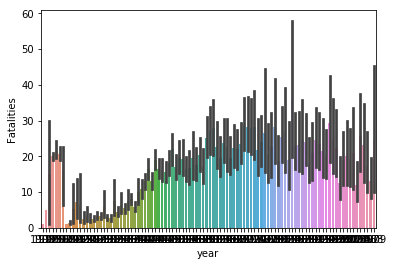

In [66]:
sns.barplot('year','Fatalities',data=crashes)

That doesn't look great, does it?  


## <font color="magenta">Q8: Create a barplot of the number of fatalities per decade and describe the results. 

Go ahead and create a new column called 'decade' 
that represents the decade for each year.  Remember that an integer divide (a.k.a. a floor divide) can be
done with the // operator.

What's the trend in airplane crash fatalities?

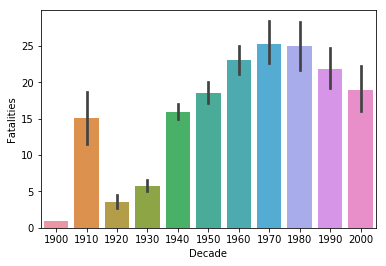

In [70]:
crashes['Decade'] = crashes['year'] // 10 * 10
sns.barplot('Decade', 'Fatalities', data = crashes)

There was a dramatic spike in fatalities in the 1910s, probably due to the increased use for recon and transportation during the First World War. Afterwards, aircraft fatalities followed a normal distribution, following the increased usage and lagging increased safety.

There is also not a large spike in the 1940s, where one would expect to see once given that the Second World War occuring during that decade. A further inspection of the dataset reveals it does not record combat losses.

## <font color="magenta">Q9: (Optional, up to 2 bonus points): Explore some of the options available in Seaborn to control the aesthetics of your plots

Using any of the figures we created in this lab, or any other figures you like, explore manipulating various ways in which you can control
the aesthetics of your figures.  See https://seaborn.pydata.org/tutorial/aesthetics.html for additional information.

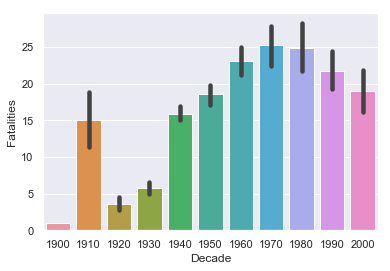

In [76]:
sns.set()
sns.set_context("notebook", rc = {'lines.linewidth': 2.5})
sns.barplot('Decade', 'Fatalities', data = crashes)

Insert your interpretation here.

## Part 4 (FYI): Functional Magnetic Resonance Imagining
**NOTE:  The remainder of this notebook requires seaborn 0.9.0 (or newer) to provide the "relplot" capabilities**

![](resources/fmri.png)

In [77]:
fmri = sns.load_dataset("fmri")

In [78]:
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

In [79]:
fmri.describe()

timepoint       signal
count  1064.000000  1064.000000
mean      9.000000     0.003540
std       5.479801     0.093930
min       0.000000    -0.255486
25%       4.000000    -0.046070
50%       9.000000    -0.013653
75%      14.000000     0.024293
max      18.000000     0.564985

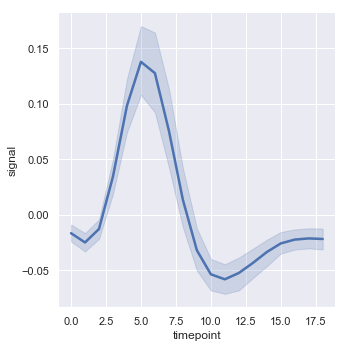

In [83]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

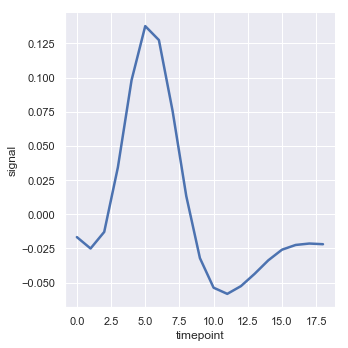

In [81]:
sns.relplot(x="timepoint", y="signal", kind="line", ci=None, data=fmri);

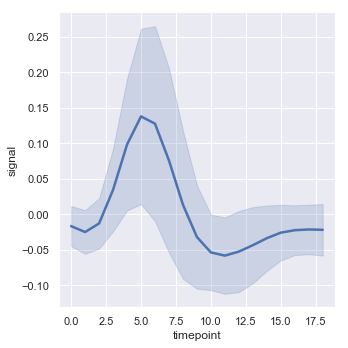

In [84]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd",data=fmri);

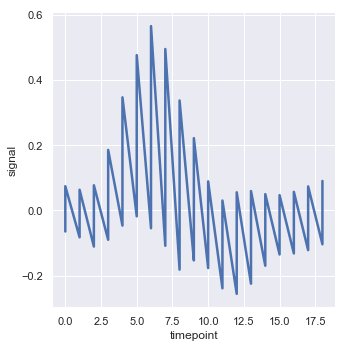

In [85]:
sns.relplot(x="timepoint", y="signal", kind="line", estimator=None, data=fmri);

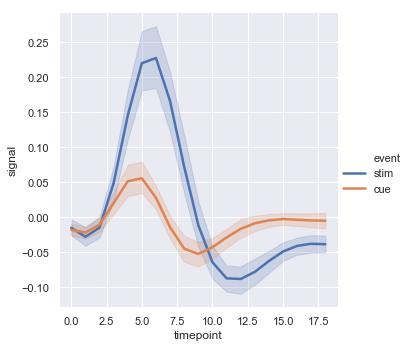

In [86]:
sns.relplot(x = "timepoint", y = "signal", kind = "line", data = fmri, hue = "event");

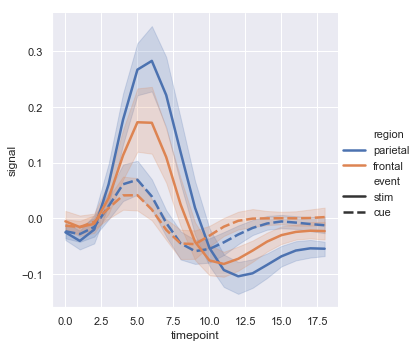

In [87]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, hue="region", style="event");